# K_Nearest Neighbors on a Project Data

In [1]:
# Import the Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the data

df=pd.read_csv("KNN_Project_Data")

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [7]:
# standardize the variables

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))

scaled_features=scaler.transform(df.drop('TARGET CLASS', axis=1))
scaled_data=pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [8]:
scaled_data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [9]:
# Train Test Split

X=scaled_data
y=df['TARGET CLASS']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=0)

In [10]:
# Apply KNN on Training data
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [11]:
# Prediction
y_pred=knn.predict(X_test)

In [12]:
# Evaluation
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[114  45]
 [ 31 110]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       159
           1       0.71      0.78      0.74       141

   micro avg       0.75      0.75      0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



In [13]:
# Elbow method to choose best k

error_rate=[]

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    
    error=np.mean(y_test!=y_pred)
    error_rate.append(error)

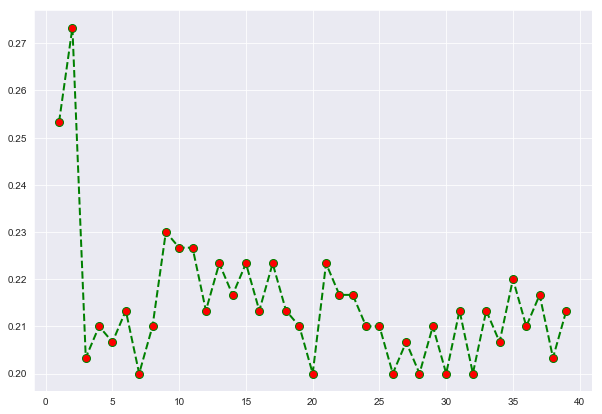

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
plt.plot(range(1,40), error_rate, color='green', marker='o', linestyle='dashed',linewidth=2, 
         markersize=8, markerfacecolor='red' )

In [15]:
# Choosing Best K

knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[122  37]
 [ 23 118]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       159
           1       0.76      0.84      0.80       141

   micro avg       0.80      0.80      0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

